# Spotify ML Analysis


### This analysis is to understand what makes a song popular on Spotify using audio features and machine learning.

We aim to:

Explore patterns in song popularity

Identify which audio features influence popularity

Predict song popularity using ML models

Segment songs into meaningful clusters

Generate insights that can support music recommendation and content strategy

### Key Business Questions

1. How is song popularity distributed across Spotify tracks?

2. Which audio features are most related to popularity?

3. Can we predict song popularity using audio characteristics?

4. Which features matter most in predicting popularity?

5. Can songs be grouped into meaningful clusters based on audio features?

## 4.1 Import Libraries

In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## 4.2 Load Data


In [56]:

df = pd.read_csv('../data/raw/dataset.csv') 

In [ ]:
# Display basic information about the dataset

df.shape

(97980, 27)

In [ ]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,valence,tempo,time_signature,track_genre,popularity_category,duration_min,length_category,energy_score,mood,potential_hit
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.715,87.917,4,acoustic,High,3.844433,Standard,0.5685,Happy,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.267,77.489,4,acoustic,Medium,2.493500,Short,0.2930,Sad,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.120,76.332,4,acoustic,Medium,3.513767,Standard,0.3985,Sad,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.143,181.740,3,acoustic,High,3.365550,Standard,0.1628,Sad,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.167,119.949,4,acoustic,High,3.314217,Standard,0.5305,Sad,0


In [ ]:
# column names
df.columns.tolist()

['Unnamed: 0',
 'track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre',
 'popularity_category',
 'duration_min',
 'length_category',
 'energy_score',
 'mood',
 'potential_hit']

In [ ]:
# check data types
df.dtypes

Unnamed: 0               int64
track_id                object
artists                 object
album_name              object
track_name              object
popularity               int64
duration_ms              int64
explicit                  bool
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time_signature           int64
track_genre             object
popularity_category     object
duration_min           float64
length_category         object
energy_score           float64
mood                    object
potential_hit            int64
dtype: object

In [8]:
# Missing Values
df.isnull().sum()

Unnamed: 0               0
track_id                 0
artists                  0
album_name               0
track_name               0
popularity               0
duration_ms              0
explicit                 0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
track_genre              0
popularity_category      0
duration_min             0
length_category        533
energy_score             0
mood                     0
potential_hit            0
dtype: int64

In [55]:
# fill missing values in 'length_category' with 'Unknown'
df['length_category'] = df['length_category'].fillna('Unknown')



## Data Preparation & Quality Checks

Dataset contains 97,980 Spotify tracks with 27 features

No missing values in critical numerical features

One categorical column (length_category) had missing values, which were filled with "Unknown"

Data types were validated and found suitable for analysis

No duplicate or corrupted records identified

Result: Clean, high-quality dataset ready for ML and dashboarding

## 4.3 Exploratory Data Analysis

In [11]:
# Statistical Summary
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,energy_score,potential_hit
count,97980.000000,97980.000000,9.798000e+04,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000
mean,56793.377536,38.673127,2.303934e+05,0.565668,0.645716,5.305471,-8.265888,0.634507,0.086405,0.310722,0.164786,0.217925,0.468711,122.682976,3.906093,3.839890,0.605692,0.024127
std,33061.843530,19.201246,1.106935e+05,0.172703,0.250406,3.553496,4.987856,0.481571,0.110205,0.329796,0.316083,0.195809,0.258619,29.963442,0.433059,1.844892,0.158710,0.153445
min,0.000000,1.000000,2.426600e+04,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404433,0.000000,0.000000
25%,28156.750000,23.000000,1.754480e+05,0.456000,0.475000,2.000000,-10.057000,0.000000,0.035900,0.014700,0.000000,0.098500,0.254000,99.966000,4.000000,2.924133,0.520500,0.000000
50%,55791.500000,39.000000,2.153820e+05,0.578000,0.687000,5.000000,-7.071000,1.000000,0.049000,0.167000,0.000060,0.133000,0.455000,122.743500,4.000000,3.589700,0.639000,0.000000
75%,84805.250000,53.000000,2.653730e+05,0.693000,0.858000,8.000000,-5.027000,1.000000,0.085600,0.589000,0.072725,0.280000,0.675000,141.091000,4.000000,4.422883,0.720500,0.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.288250,0.978000,1.000000


## 4.4 Check for popularity distribution


Text(0.5, 1.0, 'Distribution of Song Popularity')

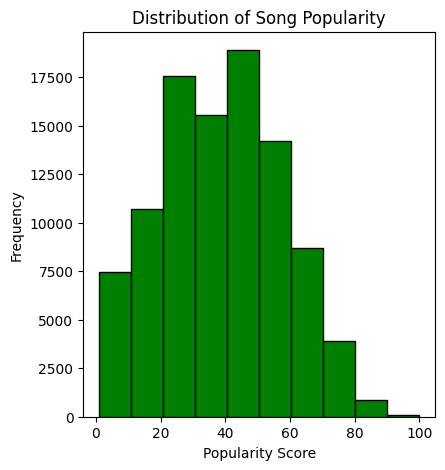

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['popularity'], color='green', edgecolor='black')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Song Popularity')

## Popularity Distribution

Song popularity is right-skewed

Most songs have low to medium popularity

Only a small percentage of tracks achieve very high popularity

### Key Insight:

Viral hits are rare — popularity is concentrated among a small subset of tracks.


Feature Correlation with Popularity:
popularity          1.000000
loudness            0.071515
danceability        0.061347
acousticness       -0.009138
valence            -0.013197
tempo              -0.018116
energy             -0.033423
liveness           -0.052048
speechiness        -0.090302
instrumentalness   -0.181604
Name: popularity, dtype: float64


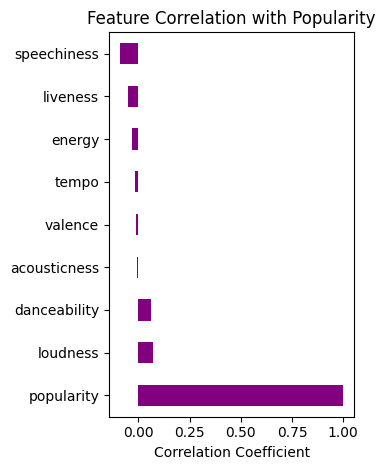

In [19]:
# Audio features correlation with popularity
audio_features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]

correlations = df[audio_features + ['popularity']].corr()['popularity'].sort_values(ascending=False)
print("\nFeature Correlation with Popularity:")
print(correlations)

plt.subplot(1, 2, 2)
correlations[:-1].plot(kind='barh', color='purple')
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlation with Popularity')
plt.tight_layout()
plt.savefig('../image/correlation_analysis.png')
plt.show()

### Analysed correlations between popularity and key audio features.

Top correlations (though generally weak):

- Loudness

- Danceability

Strong negative correlation:

- Instrumentalness

Key Insight:

Popular songs tend to be louder, more danceable, and less instrumental (i.e., more vocal-focused).

- Correlations are weak overall → popularity is influenced by many non-audio factors (marketing, artist fame, playlists).

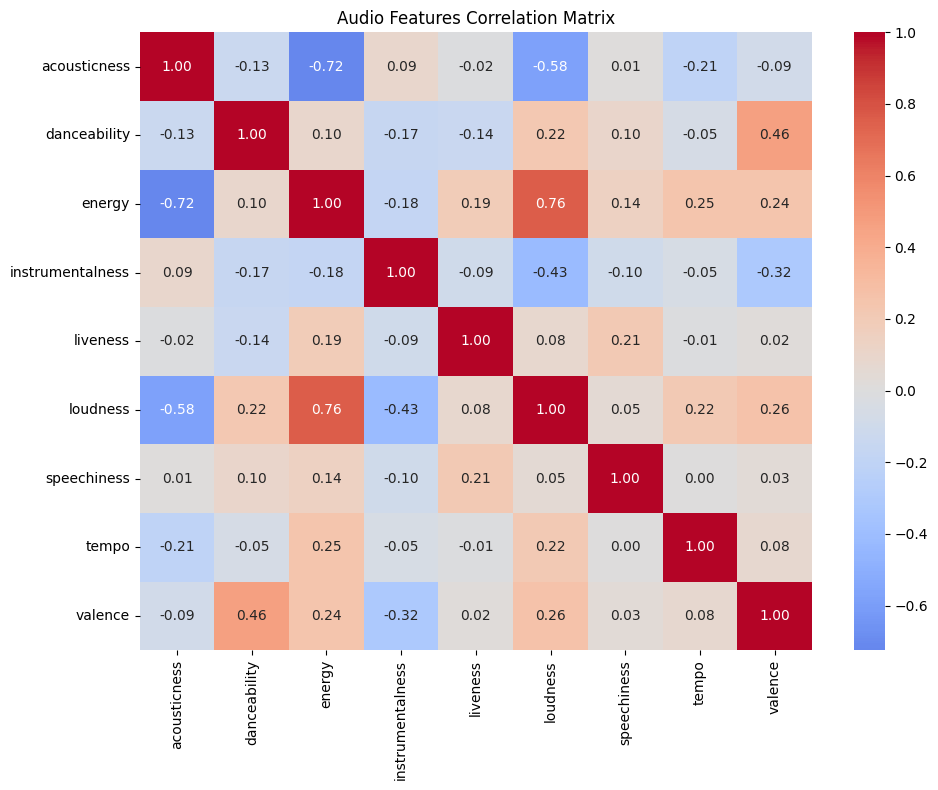

In [21]:
# Correlation heatmap for all audio features
plt.figure(figsize=(10, 8))
correlation_matrix = df[audio_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Audio Features Correlation Matrix')
plt.tight_layout()
plt.savefig('../image/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

##  4.5 Popularity Prediction (Regression)

In [22]:
# Data preparation for regression
X = df[audio_features].copy()
y = df['popularity'].copy()

In [23]:
# Handle missing values
X = X.fillna(X.mean())

In [24]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# Scale features (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train models to compare
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

results = {}

In [27]:
for model_name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

In [29]:
# Evaluate
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
    
results[model_name] = {
        'model': model,
        'y_pred': y_pred_test,
        'r2_test': r2_test,
        'rmse': rmse_test,
        'mae': mae_test
    }
    
print(f"\n{model_name} Results:")
print(f"  R² Score (Train): {r2_train:.4f}")
print(f"  R² Score (Test): {r2_test:.4f}")
print(f"  RMSE: {rmse_test:.2f}")
print(f"  MAE: {mae_test:.2f}")


Random Forest Results:
  R² Score (Train): 0.8944
  R² Score (Test): 0.4398
  RMSE: 14.46
  MAE: 10.77


### Key Insight:

- Audio features explain ~44% of popularity variation, which is reasonable given that popularity also depends on external factors.

In [30]:
# Select best model (you can change this logic)
best_model_name = 'Random Forest'
best_model_data = results[best_model_name]
best_model = best_model_data['model']
y_pred = best_model_data['y_pred']


Random Forest - Feature Importance:
            Feature  Importance
0      acousticness    0.121822
1      danceability    0.114235
5          loudness    0.114048
6       speechiness    0.113940
8           valence    0.112377
7             tempo    0.111948
3  instrumentalness    0.109544
2            energy    0.104452
4          liveness    0.097634


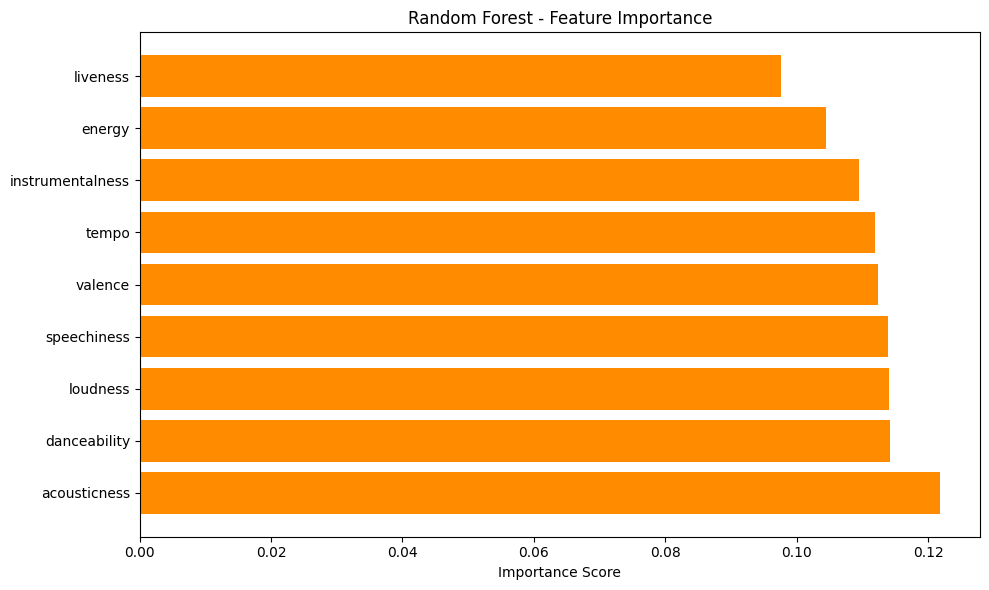

In [33]:
# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': audio_features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\n{best_model_name} - Feature Importance:")
    print(feature_importance)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='darkorange')
    plt.xlabel('Importance Score')
    plt.title(f'{best_model_name} - Feature Importance')
    plt.tight_layout()
    plt.savefig('../image/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

### Key Insight:

- A mix of sound texture, rhythm, emotion, and vocal presence drives popularity, not a single dominant factor.

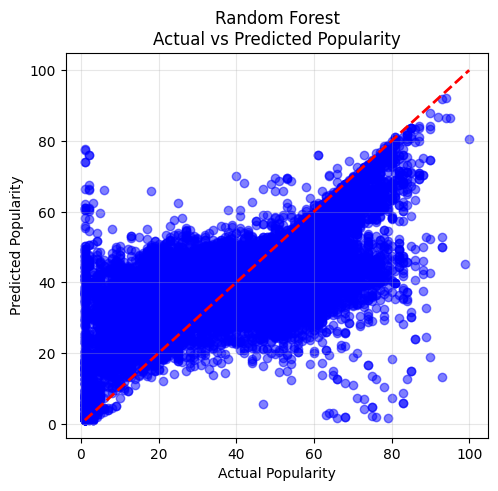

In [34]:
# Actual vs Predicted
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title(f'{best_model_name}\nActual vs Predicted Popularity')
plt.grid(True, alpha=0.3)

- Actual vs Predicted plot shows reasonable alignment with some extreme errors

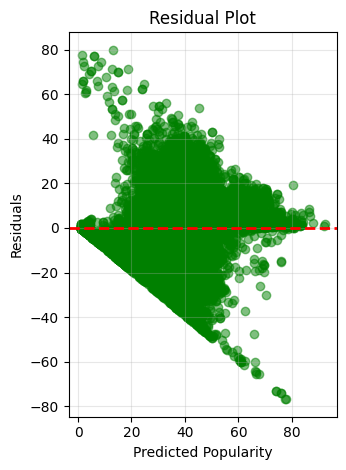

In [ ]:
# Residuals
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)

plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../image/actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

- Residual plot shows higher errors for very popular songs

### Key Insight:

- ML models struggle with viral hits, suggesting the influence of social and platform-driven effects.

In [44]:
# Save predictions for dashboard
predictions_df = pd.DataFrame({
    'track_name': df.loc[X_test.index, 'track_name'].values,
    'actual_popularity': y_test.values,
    'predicted_popularity': y_pred
})

# Create error column
predictions_df['prediction_error'] = (
    predictions_df['actual_popularity'] - predictions_df['predicted_popularity']
).abs()

# Sort by error
predictions_df = predictions_df.sort_values('prediction_error')

print("\nTop 10 Best Predictions:")
print(predictions_df.head(10))

print("\nTop 10 Worst Predictions:")
print(predictions_df.tail(10))

# Save for dashboard
predictions_df.to_csv('../data/processed/popularity_predictions.csv', index=False)



Top 10 Best Predictions:
                                    track_name  actual_popularity  \
12554                             Sensual Bebé                  1   
10489                            Dale Don Dale                  1   
1748                                    Yaaron                 42   
7584           Dream Lantern - English Version                 42   
9328                               Abracadabra                  2   
2657                                  Khone Do                 44   
12121                         Bring Me To Life                  2   
4697                             Kahaan Ho Tum                 53   
9286                          Living Dead Girl                  2   
12035  Bitter Sweet Symphony - Remastered 2016                  1   

       predicted_popularity  prediction_error  
12554                   1.0               0.0  
10489                   1.0               0.0  
1748                   42.0               0.0  
7584                  

## 4.6 Song Clustering - KMeans

In [45]:
from sklearn.cluster import KMeans

# Data preparation for clustering
X_cluster = df[audio_features].copy()
X_cluster = X_cluster.fillna(X_cluster.mean())


In [46]:
# Scale features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

In [47]:
# Find optimal number of clusters using Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.3f}")


K=2: Inertia=699016.18, Silhouette=0.254
K=3: Inertia=620296.08, Silhouette=0.161
K=4: Inertia=559045.93, Silhouette=0.169
K=5: Inertia=505656.74, Silhouette=0.176
K=6: Inertia=460423.64, Silhouette=0.188
K=7: Inertia=416947.23, Silhouette=0.197
K=8: Inertia=393121.53, Silhouette=0.179
K=9: Inertia=372183.20, Silhouette=0.183
K=10: Inertia=357814.78, Silhouette=0.168


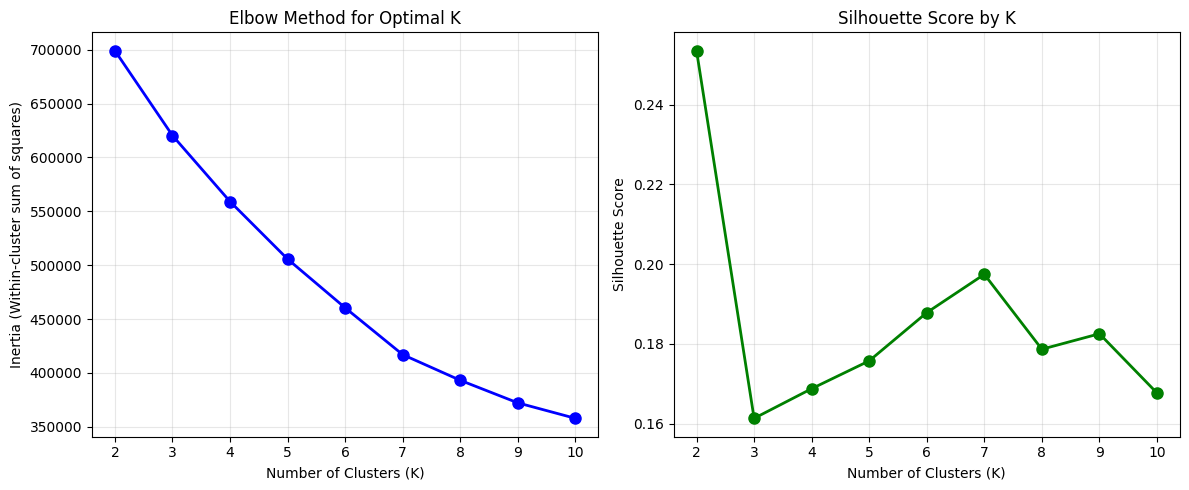

In [48]:
# Plot elbow curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by K')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../image/elbow_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:

# Train final KMeans model (choose k based on elbow plot - typically 3-5)

optimal_k = 4  # Can change this based on the elbow plot
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

print(f"\n\nUsing optimal K = {optimal_k}")
print(f"Final Silhouette Score: {silhouette_score(X_cluster_scaled, cluster_labels):.3f}")




Using optimal K = 4
Final Silhouette Score: 0.169


In [50]:
# Add cluster labels 
df['cluster'] = cluster_labels

In [51]:
# Cluster analysis
print(f"\nCluster Distribution:")
print(df['cluster'].value_counts().sort_index())

print(f"\nCluster Profiles:")
for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id][audio_features]
    print(f"\nCluster {cluster_id}:")
    print(cluster_data.mean())


Cluster Distribution:
0     7864
1    19682
2    31124
3    39310
Name: cluster, dtype: int64

Cluster Profiles:

Cluster 0:
acousticness          0.356133
danceability          0.527278
energy                0.742632
instrumentalness      0.068027
liveness              0.743581
loudness             -7.692262
speechiness           0.194972
tempo               120.507458
valence               0.495939
dtype: float64

Cluster 1:
acousticness          0.761454
danceability          0.466304
energy                0.279291
instrumentalness      0.339860
liveness              0.157215
loudness            -14.723305
speechiness           0.051110
tempo               110.384095
valence               0.288961
dtype: float64

Cluster 2:
acousticness          0.073837
danceability          0.483518
energy                0.804296
instrumentalness      0.213609
liveness              0.191830
loudness             -5.944452
speechiness           0.078356
tempo               136.299426
valence       

### Cluster Profiles

Cluster 0 – Energetic & Live

- High energy and liveness

- Likely live performances or energetic rock tracks

Cluster 1 – Acoustic & Calm

- High acousticness, low energy

- Instrumental or acoustic songs

Cluster 2 – Fast & Intense

- High energy and tempo

- Electronic or workout-style music

Cluster 3 – Happy & Danceable

- High danceability and valence

- Feel-good, mainstream pop songs

### Key Insight:

- Songs naturally group into distinct listening moods, which is ideal for playlists and recommendation systems.

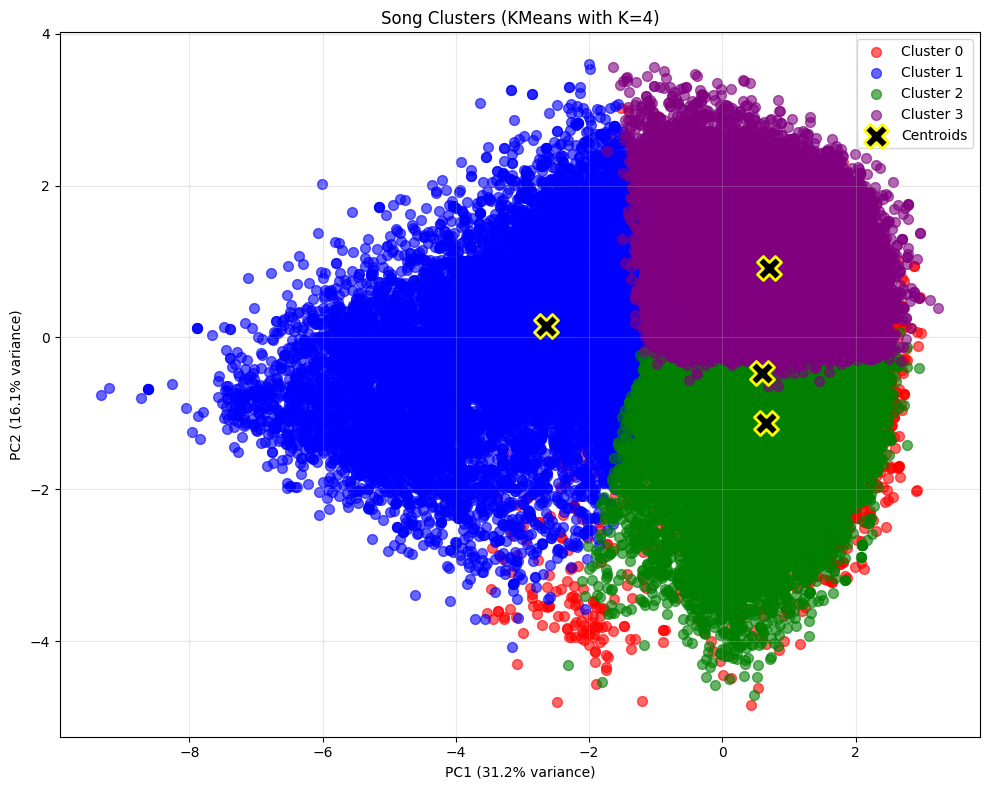

In [52]:
# Visualize clusters (using PCA for 2D visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for cluster_id in range(optimal_k):
    mask = cluster_labels == cluster_id
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=colors[cluster_id % len(colors)], 
               label=f'Cluster {cluster_id}', 
               alpha=0.6, s=50)

plt.scatter(pca.transform(kmeans_final.cluster_centers_)[:, 0],
           pca.transform(kmeans_final.cluster_centers_)[:, 1],
           c='black', marker='X', s=300, edgecolors='yellow', linewidths=2,
           label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title(f'Song Clusters (KMeans with K={optimal_k})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../image/cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


In [54]:
# Save cluster assignments for dashboard

clusters_df = pd.DataFrame({
    'track_name': df['track_name'],
    'artist': df['artists'],
    'cluster': df['cluster'],
    'popularity': df['popularity']
})
clusters_df.to_csv('../data/processed/song_clusters.csv', index=False)